✅ TensorFlow version: 2.20.0

📂 Loading MNIST dataset from local file: mnist.npz
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Flattened Training data shape: (60000, 784)
Flattened Test data shape: (10000, 784)

🧠 Model Summary:


C:\Users\Siddhant Gite\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


⚙️ Model Compiled.

🚀 Starting training...

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8992 - loss: 0.3551 - val_accuracy: 0.9623 - val_loss: 0.1427
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9566 - loss: 0.1463 - val_accuracy: 0.9627 - val_loss: 0.1263
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9698 - loss: 0.1018 - val_accuracy: 0.9738 - val_loss: 0.0922
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9770 - loss: 0.0763 - val_accuracy: 0.9733 - val_loss: 0.0858
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9814 - loss: 0.0619 - val_accuracy: 0.9778 - val_loss: 0.0763
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9847 - loss: 0.0508 - val_accuracy: 0.9762 - val_loss: 0.0839
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9873 - loss: 0.0408 - val_accuracy: 0.9782 - val_loss: 0.0780
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - ac

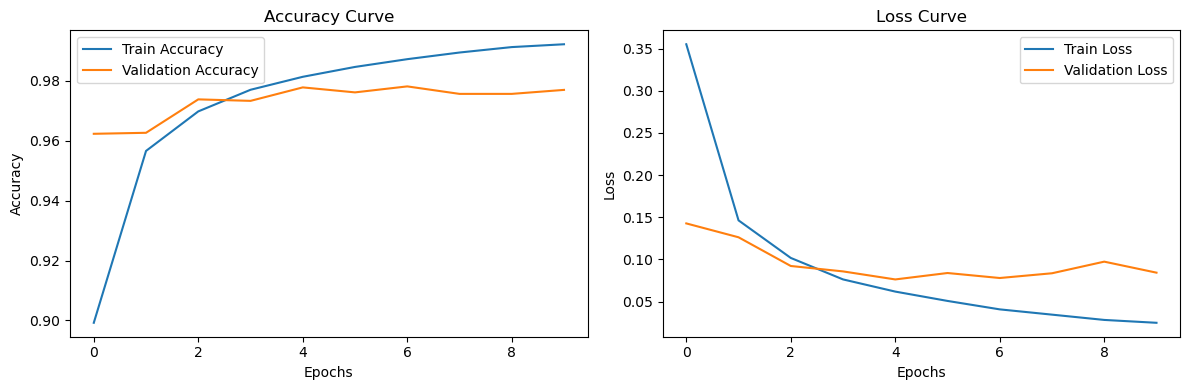


✅ Test Accuracy: 0.9784
❌ Test Loss: 0.0765


In [1]:
# ------------------------------------------------------------
# OFFLINE MNIST NEURAL NETWORK (TensorFlow + Local Dataset)
# ------------------------------------------------------------

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import numpy as np

print("✅ TensorFlow version:", tf.__version__)

# ------------------------------------------------------------
# Step 1: Load the MNIST Dataset from Local File
# ------------------------------------------------------------
# ⚠️ Change the filename below to match your actual local file name if needed
# Example valid paths: "mnist.npz" or "Downloads/mnist.npz"
local_path = "mnist.npz"

if os.path.exists(local_path):
    print(f"\n📂 Loading MNIST dataset from local file: {local_path}")
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data(path=local_path)
else:
    raise FileNotFoundError(f"❌ Could not find {local_path}. Place your dataset file in this directory.")

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# ------------------------------------------------------------
# Step 2: Normalize and Flatten the Data
# ------------------------------------------------------------
X_train = X_train / 255.0   #pixels normalize
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28 * 28)  #flatten 28*28 automatically sets by using -1
X_test = X_test.reshape(-1, 28 * 28)

print("Flattened Training data shape:", X_train.shape)
print("Flattened Test data shape:", X_test.shape)

# ------------------------------------------------------------
# Step 3: Define the Neural Network Model
# ------------------------------------------------------------
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer 1
    layers.Dense(64, activation='relu'),                       # Hidden layer 2
    layers.Dense(10, activation='softmax')                     # Output layer
])

print("\n🧠 Model Summary:")
model.summary()

# ------------------------------------------------------------
# Step 4: Compile the Model
# ------------------------------------------------------------
model.compile(
    optimizer='adam',#adaptyive laerning algo for traning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'] # fro measuring accuracy
)
print("\n⚙️ Model Compiled.")

# ------------------------------------------------------------
# Step 5: Train the Model
# ------------------------------------------------------------
print("\n🚀 Starting training...\n")
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)
print("\n✅ Training complete!")

# ------------------------------------------------------------
# Step 6: Plot Accuracy and Loss Curves
# ------------------------------------------------------------
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Step 7: Evaluate on Test Data
# ------------------------------------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"❌ Test Loss: {test_loss:.4f}")
